In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pandas_datareader as data

In [4]:
start = '2010-01-04'
end = '2019-12-30'

df = pd.read_csv('C:\\Users\\CHAITANYA\\Downloads\\AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461978,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370186,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358408,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400681,447610800


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2510,2019-12-23,70.132500,71.062500,70.092499,71.000000,68.988731,98572000
2511,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.054314,48478800
2512,2019-12-26,71.205002,72.495003,71.175003,72.477501,70.424400,93121200
2513,2019-12-27,72.779999,73.492500,72.029999,72.449997,70.397667,146266000
2514,2019-12-30,72.364998,73.172501,71.305000,72.879997,70.815491,144114400


In [6]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


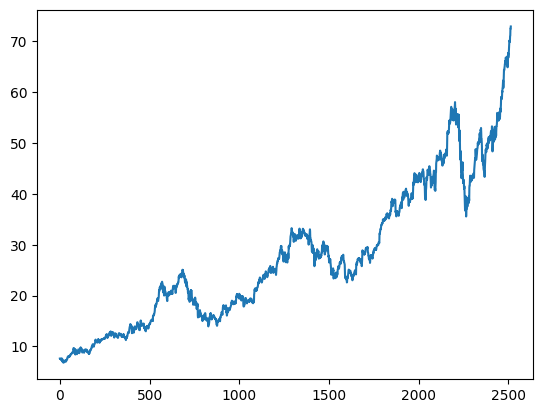

In [7]:
plt.plot(df.Close)

In [8]:
ma100 = df.Close.rolling(100).mean()
ma100


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    59.201075
2511    59.401700
2512    59.643125
2513    59.875125
2514    60.106325
Name: Close, Length: 2515, dtype: float64

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    54.132313
2511    54.261513
2512    54.396763
2513    54.529350
2514    54.661100
Name: Close, Length: 2515, dtype: float64

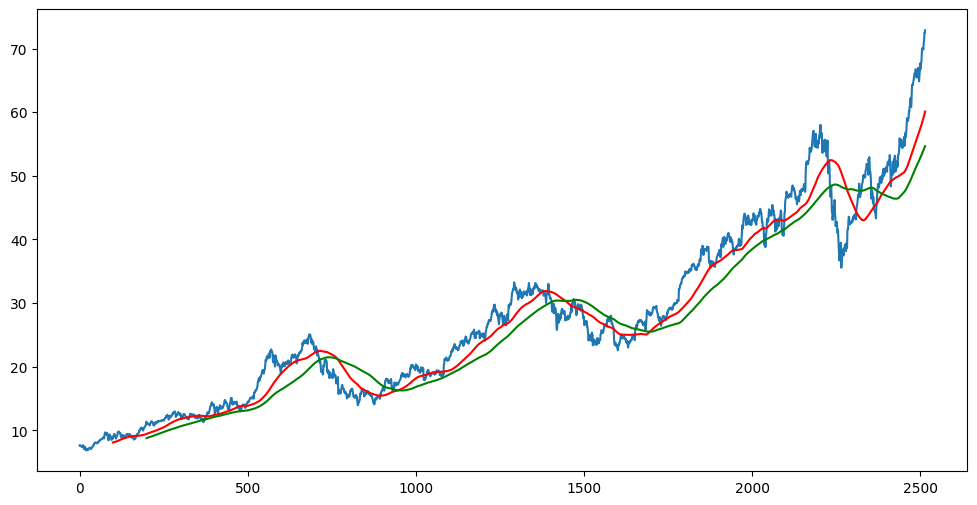

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
df.shape

(2515, 5)

In [12]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [13]:
data_training.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [14]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [15]:
 from sklearn.preprocessing import MinMaxScaler
 scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02971782],
       [0.03021855],
       [0.02560389],
       ...,
       [0.84388656],
       [0.85089658],
       [0.84616013]])

In [17]:
data_training_array.shape

(1760, 1)

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train , y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train.shape

(1660, 100, 1)

In [20]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [21]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



c:\Users\CHAITANYA\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer = 'adam', loss = "mean_squared_error")
hist = model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - loss: 0.1310
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 106ms/step - loss: 0.0158
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - loss: 0.0122
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0107
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0102
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0107
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0074
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0077
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0081
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0089
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 92ms/step - loss: 0.0078
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0067
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 96ms/step - loss: 0.0070
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - loss: 0.0075
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 0.0075

In [24]:
model.save('keras_model.h5')

In [25]:
data_testing.head()

,Close
1760,29.182501
1761,28.955000
1762,29.037500
1763,29.004999
1764,29.152500


In [26]:
past_100_days = data_training.tail(100)

In [28]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [29]:
final_df

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000
...,...
850,71.000000
851,71.067497
852,72.477501
853,72.449997


In [30]:
input_data = scaler.fit_transform(final_df)

In [31]:
input_data

array([[0.02781468],
       [0.03015022],
       [0.02585065],
       [0.02547908],
       [0.02680612],
       [0.03370672],
       [0.03317586],
       [0.03232658],
       [0.03158344],
       [0.03306972],
       [0.02855782],
       [0.03036257],
       [0.0260099 ],
       [0.02356815],
       [0.02022405],
       [0.01958705],
       [0.01523438],
       [0.01576519],
       [0.01910934],
       [0.02441748],
       [0.02425819],
       [0.02776158],
       [0.01268645],
       [0.        ],
       [0.01226184],
       [0.02558522],
       [0.04586231],
       [0.06603325],
       [0.06258296],
       [0.05547006],
       [0.05541698],
       [0.05531084],
       [0.06099054],
       [0.05085198],
       [0.05175434],
       [0.05286905],
       [0.05743405],
       [0.04803867],
       [0.05265677],
       [0.04984341],
       [0.05239134],
       [0.05265677],
       [0.05711558],
       [0.05801794],
       [0.06858118],
       [0.06990821],
       [0.07542864],
       [0.073

In [32]:
input_data.shape

(855, 1)

In [33]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [34]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [35]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step


In [36]:
y_predicted.shape

(755, 1)

In [47]:
y_predicted

array([[ 6.5744877],
       [ 6.6180987],
       [ 6.6571627],
       [ 6.6905284],
       [ 6.7175584],
       [ 6.7381015],
       [ 6.7529707],
       [ 6.764009 ],
       [ 6.7734118],
       [ 6.7830825],
       [ 6.794457 ],
       [ 6.8079653],
       [ 6.823685 ],
       [ 6.841758 ],
       [ 6.861806 ],
       [ 6.88259  ],
       [ 6.9037824],
       [ 6.924901 ],
       [ 6.946015 ],
       [ 6.967981 ],
       [ 6.991399 ],
       [ 7.0163794],
       [ 7.042473 ],
       [ 7.0717583],
       [ 7.1089687],
       [ 7.157812 ],
       [ 7.2213445],
       [ 7.302075 ],
       [ 7.401519 ],
       [ 7.5198545],
       [ 7.655622 ],
       [ 7.806664 ],
       [ 7.9714174],
       [ 8.148307 ],
       [ 8.334909 ],
       [ 8.528373 ],
       [ 8.725528 ],
       [ 8.923132 ],
       [ 9.117668 ],
       [ 9.305805 ],
       [ 9.484783 ],
       [ 9.65245  ],
       [ 9.80907  ],
       [ 9.955136 ],
       [10.091507 ],
       [10.218649 ],
       [10.3368   ],
       [10.44

In [37]:
y_test

array([0.07219071, 0.06736029, 0.06911197, 0.06842189, 0.07155372,
       0.07845432, 0.08418706, 0.08482406, 0.08822127, 0.0855672 ,
       0.08445249, 0.0895483 , 0.0894952 , 0.08838051, 0.0895483 ,
       0.08997295, 0.08938906, 0.09952758, 0.09984611, 0.09989915,
       0.09820055, 0.09671429, 0.13599451, 0.13482672, 0.13774619,
       0.144169  , 0.15075113, 0.15345824, 0.15547537, 0.15388291,
       0.16009341, 0.16927655, 0.1718775 , 0.17102826, 0.17299223,
       0.17819418, 0.18037054, 0.17729182, 0.1779819 , 0.17941503,
       0.17973358, 0.1945963 , 0.19019063, 0.19454326, 0.19220766,
       0.19316317, 0.19040292, 0.18870427, 0.19114606, 0.19146452,
       0.19034986, 0.19815284, 0.19937369, 0.19565799, 0.20346098,
       0.19486173, 0.20324861, 0.20059454, 0.19910826, 0.20038224,
       0.215882  , 0.21758056, 0.21657199, 0.21513886, 0.21535114,
       0.22103089, 0.21704979, 0.21513886, 0.21344021, 0.21253785,
       0.20436334, 0.20526572, 0.20128462, 0.20542495, 0.20208

In [48]:
y_test.shape

(755,)

In [38]:
y_predicted

array([[0.13959314],
       [0.14051911],
       [0.14134854],
       [0.14205697],
       [0.14263089],
       [0.14306708],
       [0.14338279],
       [0.14361715],
       [0.1438168 ],
       [0.14402214],
       [0.14426364],
       [0.14455046],
       [0.14488423],
       [0.14526796],
       [0.14569363],
       [0.14613493],
       [0.1465849 ],
       [0.1470333 ],
       [0.1474816 ],
       [0.147948  ],
       [0.14844522],
       [0.14897563],
       [0.14952965],
       [0.15015146],
       [0.15094154],
       [0.1519786 ],
       [0.15332755],
       [0.15504166],
       [0.15715311],
       [0.15966569],
       [0.16254838],
       [0.16575538],
       [0.16925351],
       [0.17300932],
       [0.17697138],
       [0.18107909],
       [0.1852652 ],
       [0.18946084],
       [0.19359134],
       [0.19758597],
       [0.20138612],
       [0.20494612],
       [0.20827155],
       [0.21137293],
       [0.21426842],
       [0.21696797],
       [0.21947661],
       [0.221

In [39]:
scaler.scale_

array([0.02123255])

In [40]:
scale_factor = 1/0.02123255
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor

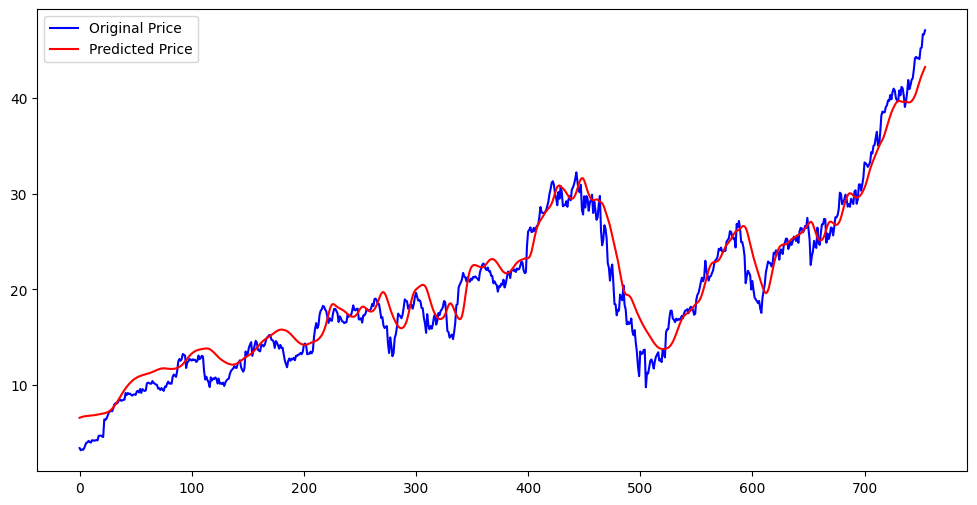

In [46]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.legend()
plt.show()